## [실습] 데이터 전처리 : kaggle 데이터

1. 데이터 준비
2. 데이터 전처리

------------------------

### 1. 데이터 준비하기 

#### 피마 인디안 당뇨병 데이터 파일 다운로드하기
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database 


------

### 2. 데이터 전처리
판다스로 csv 파일 불러와 확인하기

#### 2.1 데이터의 컬럼(feature) 살펴보기

In [9]:
# 판다스로 csv 파일 불러와 확인하기
import pandas as pd

df = pd.pandas.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### # 피마 인디어 당뇨병 데이터(diabetes.csv)
| 컬럼(feature) |설명 | 비고 |
|:------|:---|:---|
| Pregnancies | 과거 임신 횟수 |  |           
| Glucose | 혈당 수치 |  | 
| BloodPressure | 혈압 |  | 
| SkinThickness | 피부겹두께 |  | 
| Insulin | 인슐린 농도 |  | 
| BMI | 체질량 지수(Body Mass Index)  |  | 
| DiabetesPedigreeFunction | 가족력을 바탕으로 환자가 당뇨에 얼마나 취약한지를 요약한 점수 |  | 
| Age | 나이 |  | 
| Outcome | (레이블) 예측 목표 변수 |(최초 측정 후 5년 내 당뇨 발병=1, 미발병=0)  | 

#### 2.2 각 컬럼을 히스토그램(histogram)으로 시각화해보기

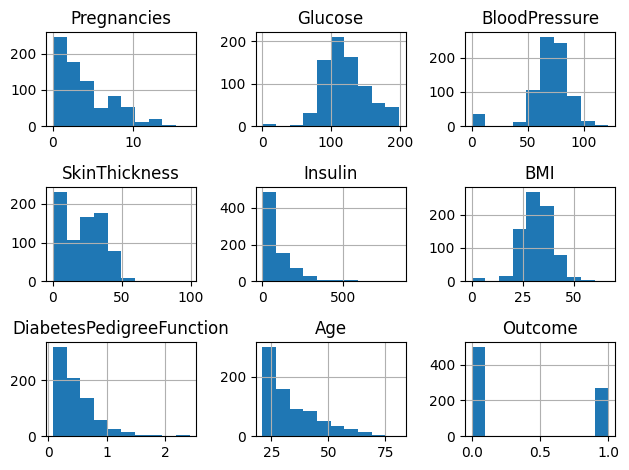

In [3]:
import matplotlib.pyplot as plt

df.hist()           # pandas의 히스토그램 함수 사용
plt.tight_layout()  # 서브 플롯 크기 또는 간격을 일정하게 맞춤
plt.show()

#### 2.3 결측치 확인하기

In [4]:
# pandas Dataframe info() 함수 사용하여 결측치 확인하기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# pandas 기술통계 요약 함수로 수치데이터 확인하기

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 각 컬럼에서 값이 0인 요소의 개수 출력
for col in df.columns:
    missing_rows = df.loc[ df[col] == 0 ].shape[0]    # 각 컬럼에서 0 값이 얼마나 존재하는지 개수를 출력
    print(f'{col} : {str(missing_rows)}')

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


#### 2.4 결측치 처리하기(결측값을 처리하는 방법)
- 행을 제거하거나 다른 값(평균, 중앙값, 최빈값)으로 대체
-  **해당 컬럼 평균값으로 수정**: Glucose(혈당), BloodPressure(혈압), SkinThickness(피부겹두께), Insulin(인슐린 농도), BMI(체질량 지수)
- **작업순서**: '0'을 NaN으로 변경 -> NaN을 평균값으로 변경

#### #작업1 :  '0'을  NaN으로 변경하기 ( df.컬럼.replace(0, np.nan)  ) 

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
import numpy as np

# 컬럼 0값을 NaN으로 변경하기
# - Glucose(혈당), BloodPressure(혈압), SkinThickness(피부겹두께), 
# - Insulin(인슐린 농도), BMI(체질량 지수) 

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_features:
    df[col].replace(0, np.nan, inplace=True)    # 0 값을 NaN으로 변경

print("Number of rows with 0 values for each variable")
print('-'*50)

# 각 컬럼에서 값이 0인 요소의 개수 출력
for col in df.columns:
    missing_rows = df.loc[ df[col] == 0 ].shape[0]    # 각 컬럼에서 0 값이 얼마나 존재하는지 개수를 출력
    print(f'{col} : {str(missing_rows)}')

Number of rows with 0 values for each variable
--------------------------------------------------
Pregnancies : 111
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


#### #작업2 : NaN을 정상값의 평균으로 변경하기 (df.컬럼.fillna(df.컬럼.mean()) )

In [15]:
# 컬럼 NaN을 정상값의 평균으로 변경하기
# - Glucose(혈당), BloodPressure(혈압), SkinThickness(피부겹두께), 
# - Insulin(인슐린 농도), BMI(체질량 지수) 

for col in zero_features:
    df[col].replace(np.nan, df[col].mean(), inplace=True)  # NaN 값을 평균값으로 변경

print("Number of rows with NaN values for each variable")
print('-'*50)

# 각 컬럼에서 값이 NaN인 요소의 개수 출력
for col in df.columns:
    missing_rows = df.loc[ df[col].isnull() ].shape[0]    # 각 컬럼에서 NaN 값이 얼마나 존재하는지 개수를 출력
    print(f'{col} : {str(missing_rows)}')

AttributeError: 'DataFrame' object has no attribute 'col'

#### 2.5 데이터 표준화
- 데이터 표준화는 범위가 다른 각 컬럼의 수치 데이터들을 평균이 0, 분산이 1이 되도록 변환하는 과정
- 사이킷런의 preprocessing 클래스 이용

In [ ]:
# 사이킷런 설치하기
!pip install scikit-learn

In [ ]:
# 데이터 표준화
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


# Target변수
df_scaled['Outcome'] = df['Outcome'] 
df = df_scaled


# 표준화된 결과 확인
df.describe().loc[['mean', 'std','max']].round(2).abs()

#### 2.6 데이터셋 분할
- 데이터를 훈련 데이터와 테스트 데이터로 분할한다.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome']    # 레이블을 제외한 나머지
Y = df.loc[:, 'Outcome']                  # 레이블

# 데이터셋 분할: 훈련 데이터(80%), 테스트 데이터(20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(f'x_train, x_test : {x_train.shape, x_test.shape}')

-------

끝